# CardCrafter

CardCrafter is an AI system that uses a multimodal model (Phi-4-multimodal-instruct, with few-shot learning) and a fine-tuned diffusion model (Stable Diffusion v1.5, fine-tuned with LoRA, a parameter-efficient fine-tuning technique) to generate images of new Yu-Gi-Oh! Spell and Trap cards.

This notebook was run in Google Colab, on a Python3 runtime with one A100 GPU.

## Install dependencies and import libraries/modules

In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/huggingface/diffusers (to revision main) to /tmp/pip-install-7ks9x6qr/diffusers_3007d0312c364120836f9ff49073bcf9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-install-7ks9x6qr/diffusers_3007d0312c364120836f9ff49073bcf9
  Resolved https://github.com/huggingface/diffusers to commit 73a9d5856f2d7ae3637c484d83cd697284ad3962
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 121.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from cardcrafter import CardCrafter
from cardcrafter_img_gen import CardCrafterImageGenerator
from dataset_processing import DatasetProcessor
import gc
from google.colab import files
import shutil
import torch

## Process dataset

Downloads and processes Yu-Gi-Oh! card dataset.

Uses Phi-4-multimodal-instruct model to extract additional card info (e.g. effect of card, image description), which is added to the dataset.

In [ ]:
dp = DatasetProcessor()
dp.process_dataset(batch_size=12, csv_save_path='./cardcrafter_dataset.csv',
                   using_ampere_gpu=True)

INFO:CardCrafter_Logger:Loading Yu-Gi-Oh card dataset from Kaggle (archanghosh/yugioh-database)...


100%|██████████| 5.35G/5.35G [04:24<00:00, 21.7MB/s]

Extracting files...



INFO:CardCrafter_Logger:Loaded dataset to /root/.cache/kagglehub/datasets/archanghosh/yugioh-database/versions/4
INFO:CardCrafter_Logger:Loading microsoft/Phi-4-multimodal-instruct model from Hugging Face
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

processing_phi4mm.py:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- processing_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.91M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

configuration_phi4mm.py:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- configuration_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi4mm.py:   0%|          | 0.00/116k [00:00<?, ?B/s]

vision_siglip_navit.py:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- vision_siglip_navit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


speech_conformer_encoder.py:   0%|          | 0.00/111k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- modeling_phi4mm.py
- vision_siglip_navit.py
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/240k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-4-multimodal-instruct/33e62acdd07cd7d6635badd529aa0a3467bb9c6a/speech_conformer_encoder.py:2774: FutureWarning: Please specify CheckpointImpl.NO_REENTRANT as CheckpointImpl.REENTRANT will soon be removed as the default and eventually deprecated.
  lambda i: encoder_checkpoint_wrapper(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

INFO:CardCrafter_Logger:Loaded model
INFO:CardCrafter_Logger:Adding image descriptions and card text to dataset...
100%|██████████| 698/698 [5:27:20<00:00, 28.14s/it]
INFO:CardCrafter_Logger:Added image descriptions and card effects to dataset
INFO:CardCrafter_Logger:Saved updated dataset CSV file to ./cardcrafter_dataset.csv


In [ ]:
files.download('./cardcrafter_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# free up memory
del dp
torch.cuda.empty_cache()
gc.collect()

231

## Fine-tune image generator

Fine-tunes (with LoRA) Stable Diffusion v1.5 to generate images (that fit the Yu-Gi-Oh! aesthetic) given image descriptions.

In [ ]:
ccig = CardCrafterImageGenerator(dataset_path='cardcrafter_dataset.csv',
                                 lora_dir='./cardcrafter_lora')

In [ ]:
ccig.train(rank=32, alpha=64, batch_size=20, num_epochs=50,
          train_text_encoder=False, using_ampere_gpu=True)

INFO:CardCrafter_Logger:Preparing dataset for Yu-Gi-Oh! card image generation...
INFO:CardCrafter_Logger:Prepared dataset for Yu-Gi-Oh! card image generation...
INFO:CardCrafter_Logger:Loading components of stable-diffusion-v1-5/stable-diffusion-v1-5...


scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

INFO:CardCrafter_Logger:Loaded components of stable-diffusion-v1-5/stable-diffusion-v1-5
INFO:CardCrafter_Logger:Added LoRA weights
INFO:CardCrafter_Logger:Fine-tuning with LoRA...


Steps:   0%|          | 0/7600 [00:00<?, ?it/s]

INFO:CardCrafter_Logger:Fine-tuning with LoRA complete
INFO:CardCrafter_Logger:Saved LoRA weights to ./cardcrafter_lora
INFO:CardCrafter_Logger:Saved LoRA config(s) to ./cardcrafter_lora


In [ ]:
img_desc_prompt = 'A crystal ball sitting on a red carpet, surrounded by dark '\
    + 'gray clouds.'

INFO:CardCrafter_Logger:Generating image for Yu-Gi-Oh! card...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:CardCrafter_Logger:Generated image for Yu-Gi-Oh! card


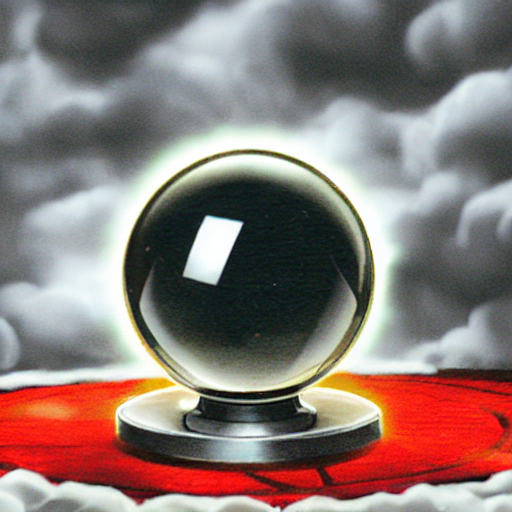

In [ ]:
ccig.generate(img_desc_prompt)

In [ ]:
shutil.make_archive('cardcrafter_lora', 'zip', './cardcrafter_lora')
files.download('./cardcrafter_lora.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# free up memory
del ccig
torch.cuda.empty_cache()
gc.collect()

115

## Generate new Yu-Gi-Oh! Spell and Trap cards

Uses the the Phi-4-multimodal-instruct model (with few-shot learning) to generate an image description from the provided card info.

Uses the fine-tuned (with LoRA) Stable Diffusion model to generate an image from the image description.

Generates the Yu-Gi-Oh! card by superimposing the card info and generated image onto a card template.

In [ ]:
cc = CardCrafter(dataset_path='cardcrafter_dataset.csv',
                 lora_dir='./cardcrafter_lora', using_ampere_gpu=True)

INFO:CardCrafter_Logger:Loading microsoft/Phi-4-multimodal-instruct model...


processor_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

processing_phi4mm.py:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- processing_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.91M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

configuration_phi4mm.py:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- configuration_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi4mm.py:   0%|          | 0.00/116k [00:00<?, ?B/s]

vision_siglip_navit.py:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- vision_siglip_navit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


speech_conformer_encoder.py:   0%|          | 0.00/111k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- modeling_phi4mm.py
- vision_siglip_navit.py
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/240k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-4-multimodal-instruct/33e62acdd07cd7d6635badd529aa0a3467bb9c6a/speech_conformer_encoder.py:2774: FutureWarning: Please specify CheckpointImpl.NO_REENTRANT as CheckpointImpl.REENTRANT will soon be removed as the default and eventually deprecated.
  lambda i: encoder_checkpoint_wrapper(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

INFO:CardCrafter_Logger:Loaded model
INFO:CardCrafter_Logger:Assembled few-shot learning prompt for generating image descriptions from card info


INFO:CardCrafter_Logger:Generating image description from provided card info...
INFO:CardCrafter_Logger:Generated image description
INFO:CardCrafter_Logger:Generating image for Yu-Gi-Oh! card...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:CardCrafter_Logger:Generated image for Yu-Gi-Oh! card
INFO:CardCrafter_Logger:Generated Yu-Gi-Oh! card


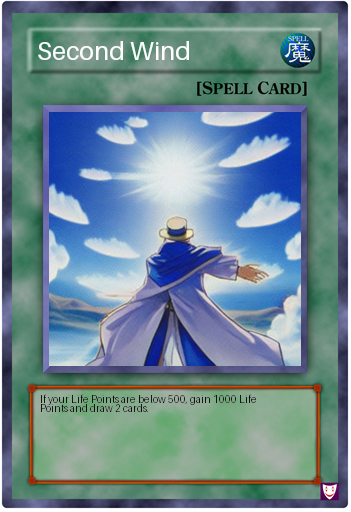

In [ ]:
card_type = 'NORMAL_SPELL'
card_name = 'Second Wind'
card_effect = 'If your Life Points are below 500, gain 1000 Life Points and '\
  + 'draw 2 cards.'
card = cc.generate(card_type, card_name, card_effect)
card

INFO:CardCrafter_Logger:Generating image description from provided card info...
INFO:CardCrafter_Logger:Generated image description
INFO:CardCrafter_Logger:Generating image for Yu-Gi-Oh! card...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:CardCrafter_Logger:Generated image for Yu-Gi-Oh! card
INFO:CardCrafter_Logger:Generated Yu-Gi-Oh! card


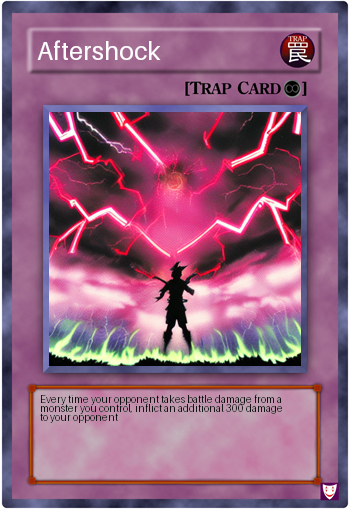

In [ ]:
card_type = 'CONTINUOUS_TRAP'
card_name = 'Aftershock'
card_effect = 'Every time your opponent takes battle damage from a monster '\
    + 'you control, inflict an additional 300 damage to your opponent'
card = cc.generate(card_type, card_name, card_effect)
card